# Podstawy Reprezentacji i Analizy Danych: PROJEKT
## Monika Osiak, Marharyta Kruk

### Wstęp

Problemy z kręgosłupem mogą być wywołane przez wiele czynników - jakiekolwiek podrażnienie jednego z nerwów, które składają się na rozbudowany system nerwowy powiązany z kręgosłupem, może skutkować bólem promieniującym na inne części ciała.

Zestaw rozpatrywanych przez nas danych składa się z 310 obserwacji, opisywanych przez dwanaście atrybutów opisujących (dotyczących budowy kręgosłupa) oraz atrybutu decyzyjnego określającego, czy obserwacja dotyczy osoby zdrowej (Normal) czy zmagającej się z bólem (Abnormal).

Naszym zadaniem jest określenie na podstawie danych o budowie kręgosłupa, czy osoba cierpi na bóle pleców czy nie.

### Przygotowanie danych

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ustawienie formatu wyświetlania liczb zmiennoprzecinkowych
pd.options.display.float_format = "{:.1f}".format 

# ignorowanie ostrzeżeń
import warnings
warnings.filterwarnings('ignore')

Wczytuję dane z pliku, dokonuję zamiany oznaczeń atrybutu decyzyjnego (Abnormal => 1, Normal => 0), po czym wyświetlam pięć pierwszych rekordów.

In [29]:
data = pd.read_csv('dataset_spine.csv', usecols=range(13))

columns = ['pelvic_incidence',
           'pelvic tilt',
           'lumbar_lordosis_angle',
           'sacral_slope',
           'pelvic_radius', 
           'degree_spondylolisthesis',
           'pelvic_slope',
           'Direct_tilt',
           'thoracic_slope',
           'cervical_tilt',
           'sacrum_angle',
           'scoliosis_slope',
           'Class_att']
data.columns = columns
columns = columns[:-1] # przygotowanie listy zmiennych do dalszego użycia potem
data["Class_att"] = [1 if i=="Abnormal" else 0 for i in data.Class_att]
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.0,22.6,39.6,40.5,98.7,-0.3,0.7,12.6,14.5,15.3,-28.7,43.5,1
1,39.1,10.1,25.0,29.0,114.4,4.6,0.4,12.9,17.5,16.8,-25.5,16.1,1
2,68.8,22.2,50.1,46.6,106.0,-3.5,0.5,26.8,17.5,16.7,-29.0,19.2,1
3,69.3,24.7,44.3,44.6,101.9,11.2,0.4,23.6,12.7,11.4,-30.5,18.8,1
4,49.7,9.7,28.3,40.1,108.2,7.9,0.5,35.5,16.0,8.9,-16.4,24.9,1


Sprawdzam, ile danych mam do dyspozycji.

In [20]:
data.shape
print('Liczba obserwacji: {},\nliczba atrybutów: {}'.format(data.shape[0], data.shape[1] - 1))

Liczba obserwacji: 310,
liczba atrybutów: 12


In [21]:
data.isna().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

Dane są kompletne - brak NaN.

In [30]:
data.groupby('Class_att').count().pelvic_radius

Class_att
0    100
1    210
Name: pelvic_radius, dtype: int64

Wśród dostępnych obserwacji jest 100 obserwacji ludzi zdrowych i 210 obserwacji ludzi cierpiących na bóle kręgosłupa.

Nie jest to sytuacja idealna, ponieważ obserwacji nieprawidłowych jest ponad dwa razy więcej niż obserwacji prawidłowych, co będzie wpływać na jakość wytrenowania klasyfikatorów. Z drugiej strony taki rozkład ilości grup może oznaczać, że wśród pacjentów większość skarży się na bóle kręgosłupa.

## Analiza atrybutów

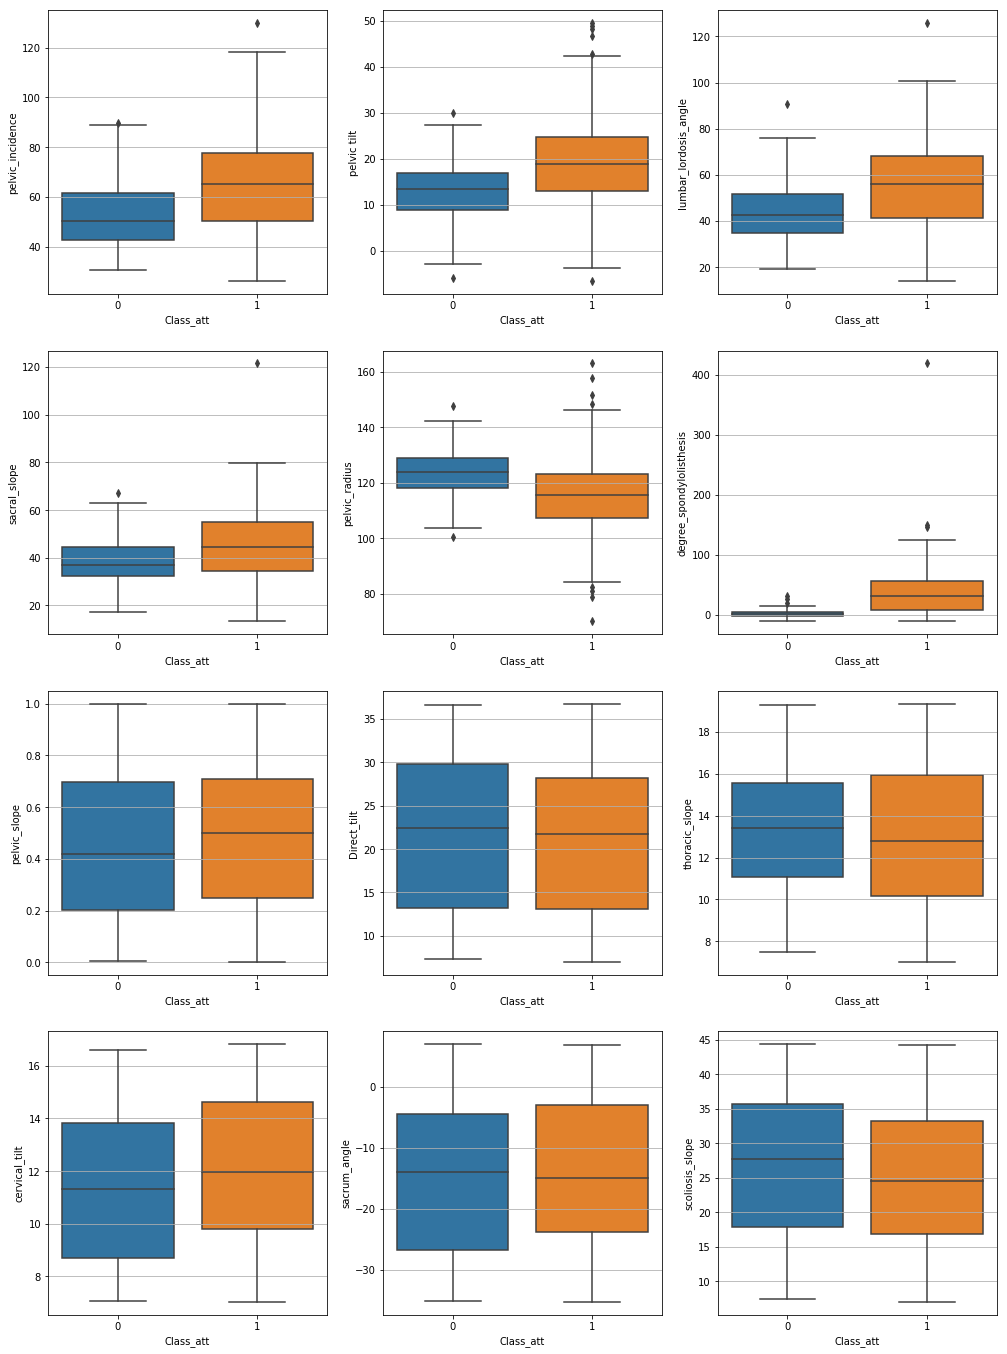

In [47]:
plt.figure(figsize=(17,24))
for i, c in enumerate(columns):
    plt.subplot(4, 3, i+1)
    plt.grid()
    sns.boxplot(x=data.Class_att, y=data[c])

## Histogramy cech

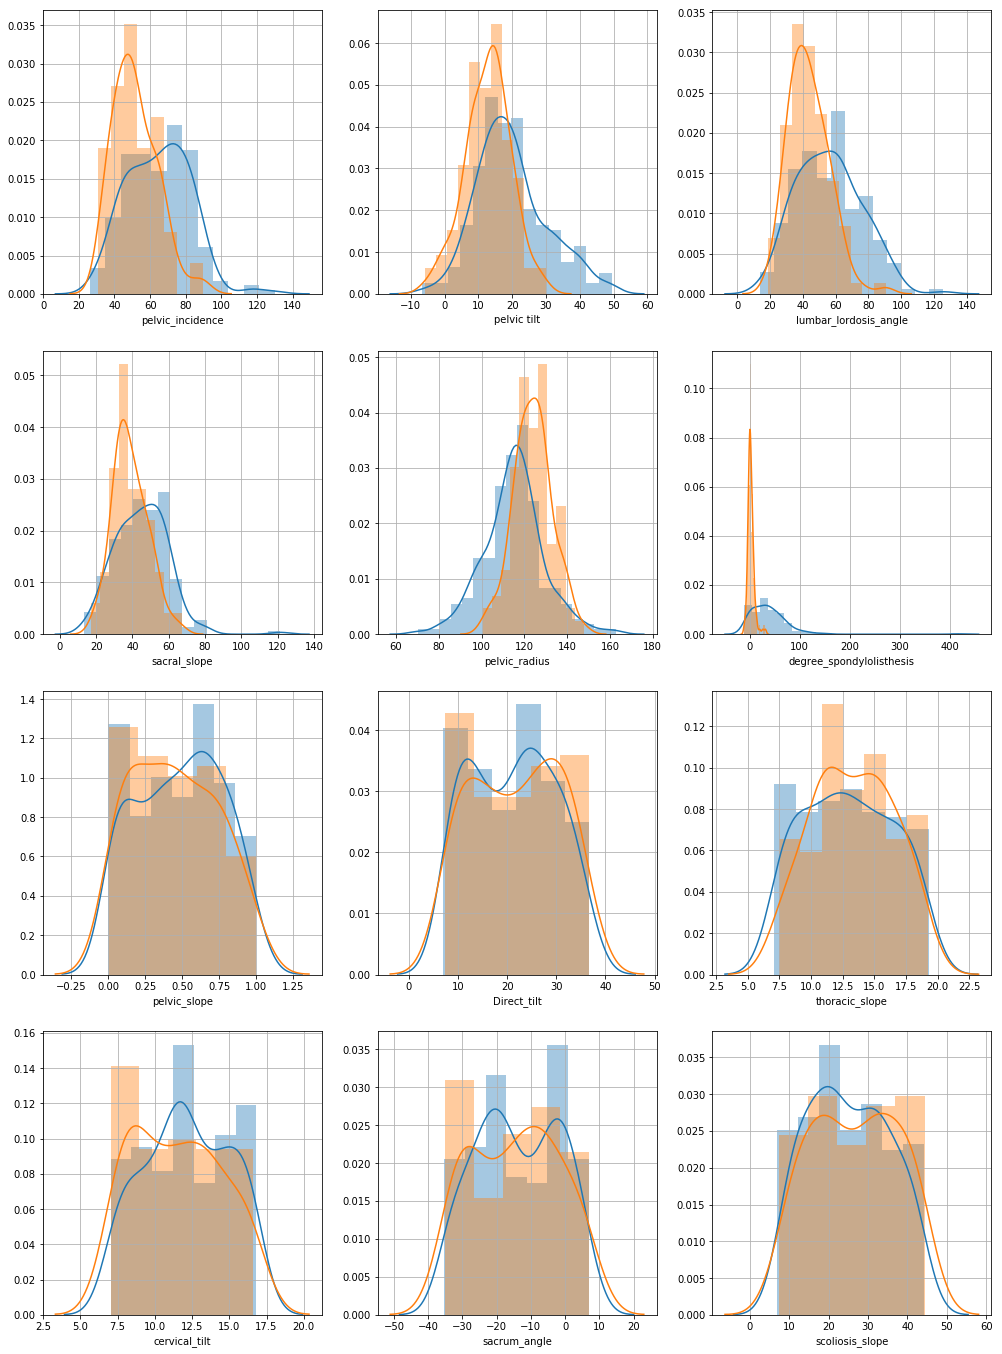

In [53]:
plt.figure(figsize=(17,24))
for i, c in enumerate(columns):
    plt.subplot(4, 3, i+1)
    plt.grid()
    sns.distplot(data.loc[data.Class_att == 1, c], label="Abnormal")
    sns.distplot(data.loc[data.Class_att == 0, c], label="Normal")

## Standaryzacja danych

In [13]:
from sklearn import preprocessing

x = data.drop(["Class_att"],axis=1)
y = data.Class_att.values
names = x.columns

scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=names)
x.head()


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.1,0.5,-0.7,-0.2,-1.4,-0.7,1.0,-1.0,0.4,1.2,-1.2,1.7
1,-1.2,-0.7,-1.5,-1.0,-0.3,-0.6,-0.2,-1.0,1.3,1.7,-0.9,-0.9
2,0.5,0.5,-0.1,0.3,-0.9,-0.8,0.0,0.6,1.3,1.6,-1.2,-0.6
3,0.5,0.7,-0.4,0.1,-1.2,-0.4,-0.4,0.3,-0.1,-0.2,-1.3,-0.7
4,-0.6,-0.8,-1.3,-0.2,-0.7,-0.5,0.2,1.6,0.9,-1.1,-0.2,-0.1


## Korelacja między atrybutami

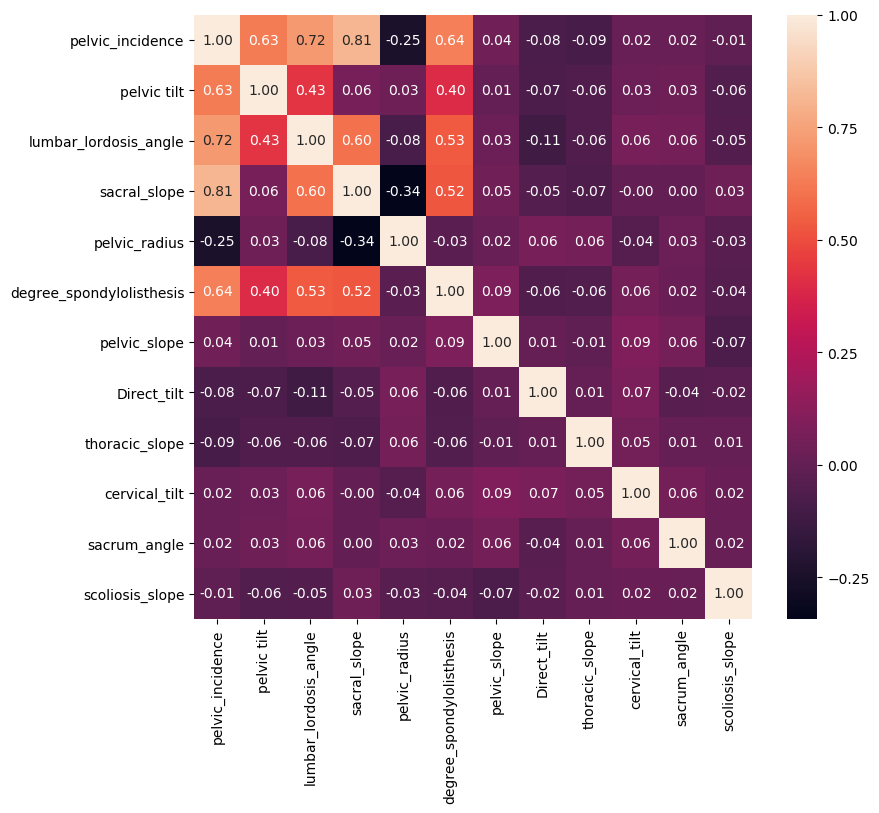

In [14]:
plt.figure(figsize=(9,8), dpi = 100)
sns.heatmap(x.corr(), annot=True, fmt='.2f')

Mapa ciepła pokazuje, że część atrybutów jest ze sobą bardzo skorelowana, podczas gdy inne nie mają żadnego wpływu. Ograniczyłyśmy nasze dane do atrybutów:
* pelvic incidence
* pelvic tilt
* lumbar lordosis angle
* sacral slope
* degree spondylolisthesis

które to atrybuty są najbardziej skorelowane ze sobą.

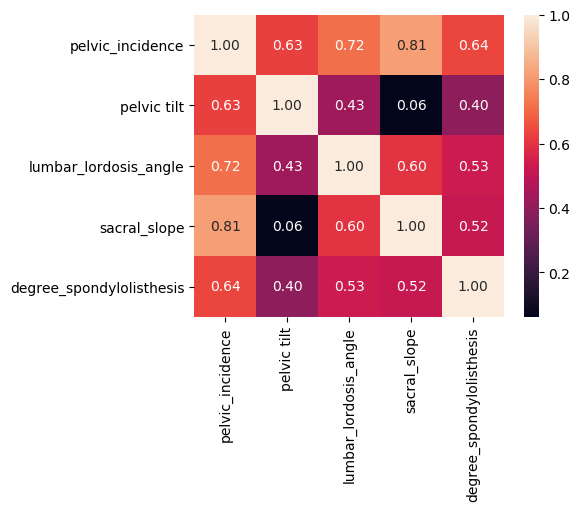

In [15]:
x = x.loc[:, ['pelvic_incidence',
              'pelvic tilt',
              'lumbar_lordosis_angle',
              'sacral_slope',
              'degree_spondylolisthesis'
              ]]
plt.figure(figsize=(5,4), dpi = 100)
sns.heatmap(x.corr(), annot=True, fmt='.2f')

## Podział zbioru danych na część treningową i testową

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Regresja liniowa

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

print("Logistic regression test accuracy:", lr_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Logistic regression test accuracy: 0.8172043010752689

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.88      0.87      0.88        69

   micro avg       0.82      0.82      0.82        93
   macro avg       0.76      0.77      0.76        93
weighted avg       0.82      0.82      0.82        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,16,8
Actual_Abnormal,9,60


Poprawność przewidywania na poziomie 81,72% sprawia, że klasyfikacja z użyciem regresji liniowej jest najodpowiedniejsza w tym zadaniu.

## Naiwny klasyfikator bayesowski

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)

print("Naive Bayes test accuracy:", gnb_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Naive Bayes test accuracy: 0.7741935483870968

              precision    recall  f1-score   support

           0       0.54      0.83      0.66        24
           1       0.93      0.75      0.83        69

   micro avg       0.77      0.77      0.77        93
   macro avg       0.73      0.79      0.74        93
weighted avg       0.83      0.77      0.79        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,20,4
Actual_Abnormal,17,52


Naiwny klasyfikator Bayesa osiągnął bardzo dobrą precyzję przy przewidywaniu, które obserwacje są nieprawidłowe, ale przy obserwacjach w normie okazał się kiepski.

## Algorytm k najbliższych sąsiadów (KNN)

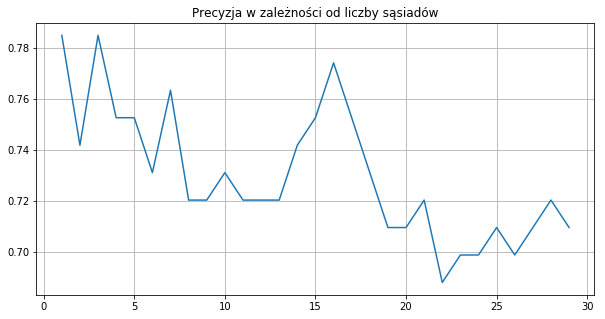

In [33]:
from sklearn.neighbors import KNeighborsClassifier

graph = []
for i in range(1, 30):
    knn_model = KNeighborsClassifier(i)
    knn_model.fit(x_train, y_train)
    graph.append(knn_model.score(x_test, y_test))

plt.figure(figsize=(10,5))    
sns.lineplot(x = range(1,30), y = graph)
plt.title('Precyzja w zależności od liczby sąsiadów')
plt.grid()
plt.show()

Największą precyzję otrzymujemy przy uwzględnieniu jednego lub trzech sąsiadów.

In [22]:
knn_model = KNeighborsClassifier(3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print("KNN test accuracy:", knn_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

KNN test accuracy: 0.7849462365591398

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        24
           1       0.86      0.86      0.86        69

   micro avg       0.78      0.78      0.78        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.78      0.78      0.78        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,14,10
Actual_Abnormal,10,59


Klasyfikator KNN jest nieco lepszy od klasyfikatora Bayesa, ale nieco gorszy od regresji liniowej. Jest to też kolejny klasyfikator, który wykazuje się lepszą precyzją przy przewidywaniu obserwacji nieprawidłowych.

## Metoda wektorów nośnych (SVM)

In [23]:
from sklearn.svm import SVC 

svclassifier = SVC(kernel='poly', degree=4)  
svclassifier.fit(x_train, y_train)  
y_pred = svclassifier.predict(x_test)

print("SVM test accuracy:", knn_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

SVM test accuracy: 0.7849462365591398

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.74      1.00      0.85        69

   micro avg       0.74      0.74      0.74        93
   macro avg       0.37      0.50      0.43        93
weighted avg       0.55      0.74      0.63        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,0,24
Actual_Abnormal,0,69


Pomimo teoretycznie niezłej skuteczności, okazuje się że klasyfikator uznał wszystkie obserwacje za nieprawidłowe, co jest rażącym błędem.

## Drzewa decyzyjne

In [24]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth=2)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

print("Tree test accuracy:", tree_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Tree test accuracy: 0.8064516129032258

              precision    recall  f1-score   support

           0       0.59      0.79      0.68        24
           1       0.92      0.81      0.86        69

   micro avg       0.81      0.81      0.81        93
   macro avg       0.76      0.80      0.77        93
weighted avg       0.83      0.81      0.81        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,19,5
Actual_Abnormal,13,56


Klasyfikator z użyciem drzew decyzyjnych osiągnął drugą najlepszą skuteczność spośród przetestowanych przez nas klasyfikatorów - w porównaniu z regresją liniową ma lepszą precyzję w przewidywaniu obserwacji nieprawidłowych i gorszą w przypadku obserwacji prawidłowych.

## Losowy las decyzyjny

In [41]:
from sklearn.ensemble import RandomForestClassifier

n_trees = [10, 20, 50, 100, 150, 200, 250, 300]
for i in n_trees:
    random_forest = RandomForestClassifier(n_estimators=i, random_state=4)
    random_forest.fit(x_train,y_train)
    y_pred = random_forest.predict(x_test)
    print('number of trees: %d' %(i))
    correct_pred = 0
    for j,k in zip(y_test, y_pred):
        if j == k:
            correct_pred += 1
    print('correct predictions: %f' %(correct_pred/len(y_test) *100))
    matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                          columns=['Predicted_Normal','Predicted_Abnormal'],
                          index=['Actual_Normal','Actual_Abnormal'])
    print(matrix)
    print()

number of trees: 10
correct predictions: 79.569892
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  13                  11
Actual_Abnormal                 8                  61

number of trees: 20
correct predictions: 81.720430
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  14                  10
Actual_Abnormal                 7                  62

number of trees: 50
correct predictions: 79.569892
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  13                  11
Actual_Abnormal                 8                  61

number of trees: 100
correct predictions: 77.419355
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  11                  13
Actual_Abnormal                 8                  61

number of trees: 150
correct predictions: 77.419355
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  11    

Klasyfikator wykazuje się najlepszą skutecznością dla 20 drzew decyzyjnych.

In [43]:
rf_model = RandomForestClassifier(n_estimators = 20, random_state=4)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)

print("Random tree forest test accuracy:", rf_model.score(x_test,y_test))
print(classification_report(y_test,y_pred)) 
pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Random tree forest test accuracy: 0.8172043010752689
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        24
           1       0.86      0.90      0.88        69

   micro avg       0.82      0.82      0.82        93
   macro avg       0.76      0.74      0.75        93
weighted avg       0.81      0.82      0.81        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,14,10
Actual_Abnormal,7,62


Losowy las decyzyjny osiągnął skuteczność na poziomie regresji liniowej.

## Wnioski

* Ze wszystkich przetestowanych przez nas klasyfikatorów **najlepsze wyniki uzyskałyśmy przy użyciu regresji liniowej i losowego lasu decyzyjnego**.
* **Najgorszym klasyfikatorem była metoda wektorów nośnych** która wszystkie obserwacje sklasyfikowała jako Abnormal.
* Wszystkie klasyfikatory lepiej radziły sobie z klasyfikowaniem obserwacji nieprawidłowych, ponieważ było ich w zbiorze danych więcej niż obserwacji prawidłowych.
* Atrybutem, który najbardziej charakteryzował obserwacje nieprawidłowe był degree_spondylolithesis w obserwacjach prawidłowych oscylował wokół zera, a w nieprawidłowych miał zdecydowanie większy zakres.